In [19]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [20]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',150)

# <font color = blue> Credit EDA Case Study </font>


Problem Statement:

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter.  

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. 
Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The dataset contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

1. The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

2. All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions which are 'Approved','Cancelled','Refused' and 'Unused offer' depending on scenarios.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

Also,this case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

### Reading the file from the specified location.

In [21]:
# Read the csv file using 'read_csv' and store it in a dataframe.

df = pd.read_csv(r'C:\Users\91990\Desktop\Data_Science\EDA_Case_study\application_data.csv')

Inspect the dataframe for dimensions, null-values, and summary of different numeric/non-numeric columns.

In [22]:
# Check the number of rows and columns in the dataframe
df.shape

(307511, 122)

The above shows the dataset has 307511 rows and 122 columns

In [6]:
# Check the datatypes of all the columns of the dataframe depending on different category like int,float etc.

df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [7]:
# Let us find out the unique values of each and every column

df.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_18                     2
FLAG_DOCUMENT_14                     2
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_PHONE                           2
FLAG_EMAIL                           2
FLAG_DOCUMENT_15                     2
FLAG_DOCUMENT_16                     2
FLAG_DOCUMENT_17                     2
EMERGENCYSTATE_MODE                  2
REG_CITY_NOT_WORK_CITY               2
REG_CITY_NOT_LIVE_CITY               2
REG_REGION_NOT_LIVE_REGION           2
FLAG_DOCUMENT_19                     2
REG_REGION_NOT_WORK_REGION           2
FLAG_DOCUMENT_20                     2
FLAG_DOCUMENT_13                     2
TARGET                               2
NAME_CONTRACT_TYPE                   2
FLAG_DOCUMENT_2                      2
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
FLAG_DOCUMENT_3          

In [7]:
# Let us find out the count and the unique values of each and every column

df.agg(['count','nunique'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307499,307233,306219,307511,307511,307511,307511,307511,307511,307511,307511,307511,104582,307511,307511,307511,307511,307511,307511,211120,307509,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,134133,306851,246546,151450,127568,157504,103023,92646,143620,152683,154491,98869,124921,97312,153161,93997,137829,151450,127568,157504,103023,92646,143620,152683,154491,98869,124921,97312,153161,93997,137829,151450,127568,157504,103023,92646,143620,152683,154491,98869,124921,97312,153161,93997,137829,97216,153214,159080,151170,161756,306490,306490,306490,306490,307510,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
nunique,307511,2,2,3,2,2,15,2548,5603,13672,1002,7,8,5,6,6,81,17460,12574,15688,6168,62,2,2,2,2,2,2,18,17,3,3,7,24,2,2,2,2,2,2,58,114584,119831,814,2339,3780,285,149,3181,257,285,403,305,3527,1868,5199,386,3290,760,3841,221,154,3128,26,30,25,25,3563,736,5301,167,3327,1148,3772,245,151,3202,46,46,49,47,3560,1097,5281,214,3323,4,3,5116,7,2,33,10,33,9,3773,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,5,9,9,24,11,25


In [8]:
# check few rows to have a glance on data 
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

There are many categorical FLAG fields which have 1/0 values.

In [23]:
# Find out how much null percentage data is there in each column and save it in a different variable
null_data_perc = df.isnull().sum()*100 /len(df)

In [24]:
# Check the null percentage of the columns which has null value percentage greater than 10 and 
# its been found that most of them have null percentage more than 45
null_data_perc[null_data_perc > 10]

OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_1                    56.381073
EXT_SOURCE_3                    19.825307
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53

The above shows that there are few columns that have NULL percentage <20% and then 
there is OCCUPATION_TYPE which has 31% missing values. Rest all have missing values more than 45%. 
We cannot drop OCCUPATION_TYPE because it plays an imortant role to find whether the person will default or not. 
Hence we are dropping columns with equal or more than 45% missing values.

In [25]:
# save the column names where the null value percentage is more than or equal to 45.
cols_null = null_data_perc[null_data_perc >=45]

In [26]:
# drop the columns where most of the values are null and save the result in a different dataset
df1 = df.drop(columns = cols_null.index)

In [27]:
df1.shape

(307511, 73)

Now the above shows the number of columns is 73 now in the new dataset which will be taken for further steps.

In [28]:
# Check NaN value percentage of rows and then will check if its more than expected
null_rows_perc = df1.isnull().sum(axis =1)/df1.shape[1]

In [29]:
# This indicates there is not much NaN in rows.
null_rows_perc[null_rows_perc >45]

Series([], dtype: float64)

In [30]:
# Lets check the columns where null percentage < 45
cols_less_null = null_data_perc[null_data_perc <45]

In [21]:
cols_less_null

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

Lets check for the below columns where less percentage of NULL VALUES are present and try to find out what values can be imputed.

AMT_ANNUITY                     
AMT_GOODS_PRICE                 
NAME_TYPE_SUITE                 
OCCUPATION_TYPE                
EXT_SOURCE_2                    
EXT_SOURCE_3   
CNT_FAM_MEMBERS
OBS_30_CNT_SOCIAL_CIRCLE        
DEF_30_CNT_SOCIAL_CIRCLE        
OBS_60_CNT_SOCIAL_CIRCLE        
DEF_60_CNT_SOCIAL_CIRCLE        
DAYS_LAST_PHONE_CHANGE          
AMT_REQ_CREDIT_BUREAU_HOUR     
AMT_REQ_CREDIT_BUREAU_DAY      
AMT_REQ_CREDIT_BUREAU_WEEK     
AMT_REQ_CREDIT_BUREAU_MON      
AMT_REQ_CREDIT_BUREAU_QRT      
AMT_REQ_CREDIT_BUREAU_YEAR

In [31]:
df1.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

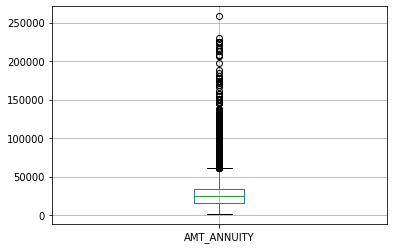

In [32]:
# AMT_ANNUITY box plot
df1.boxplot(column=['AMT_ANNUITY'])
plt.show()

In [36]:
df1.AMT_ANNUITY.median()

24903.0

### Observation: From box plot it is appearing that AMT_ANNUITY has lot of outliers so need to consider median value which is 24903.0 for imputing missing values.

In [122]:
df1.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

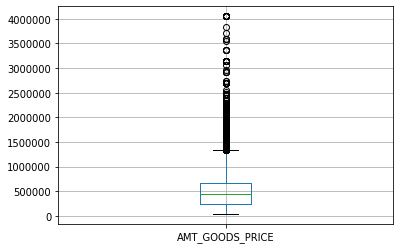

In [37]:
# AMT_GOODS_PRICE box plot
df1.boxplot(column=['AMT_GOODS_PRICE'])
plt.show()

In [41]:
df1.AMT_GOODS_PRICE.median()

450000.0

### Observation: From box plot it is appearing that AMT_GOODS_PRICE has lot of outliers so need to consider median value which is 450000.0 for imputing missing values.

In [46]:
# NAME_TYPE_SUITE

df1.NAME_TYPE_SUITE.value_counts(normalize=True) * 100

Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

In [47]:
df1.NAME_TYPE_SUITE.mode()

0    Unaccompanied
dtype: object

The column NAME_TYPE_SUITE can be imputed with mode value 'Unaccompanied' as its a categorical column.

In [91]:
# OCCUPATION_TYPE

df1.OCCUPATION_TYPE.describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [49]:
df1.OCCUPATION_TYPE.value_counts(normalize =True) * 100


Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

In [50]:
# Checking few data to understand the rows where OCCUPATION_TYPE is missing.
df1[df1.OCCUPATION_TYPE.isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,-3514,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,-20417,365243,-5246.0,-2512,1,0,0,1,1,0,NaN,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,0.555183,0.652897,0.0,0.0,0.0,0.0,-2396.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,-24827,365243,-9012.0,-3684,1,0,0,1,1,0,NaN,2.0,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,0.624305,0.669057,0.0,0.0,0.0,0.0,-795.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
28,100033,0,Cash loans,M,Y,Y,0,270000.000,790830.0,57676.5,675000.0,Unaccompanied,State servant,Higher education,Single / not married,House / apartment,0.046220,-9994,-1796,-4668.0,-2661,1,1,0,1,0,1,NaN,1.0,1,1,WEDNESDAY,11,0,1,1,0,0,0,Military,0.685011,0.524496,0.0,0.0,0.0,0.0,-849.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
30,100035,0,Cash loans,F,N,Y,0,292500.000,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,1,1,0,1,0,1,NaN,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.0,0.0,0.0,0.0,-1634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307486,456230,0,Cash loans,F,Y,Y,1,292500.000,355536.0,18283.5,270000.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,House / apartment,0.072508,-16010,-1185,-5034.0,-4392,1,1,0,1,1,0,NaN,3.0,1,1,SATURDAY,17,0,0,0,0,0,0,Business Entity Type 2,0.661025,0.199771,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,936000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.010147,-23125,365243,-5485.0,-4115,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,XNA,0.307082,0

#### Observation: About 26% of data is labourers. Looking at the data it is found that the OCCUPATION_TYPE = NAN where in many rows the income type is Pensioner etc. So it will be inapproprate to impute it with mode which will be "Labourers" . It will be more appropriate to impute with something like "Unknown"

In [52]:
df1.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True) *100

0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [53]:
df1.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True) *100


0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [54]:
df1.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts(normalize=True) *100


0.0    96.790881
1.0     3.085807
2.0     0.074814
3.0     0.021805
4.0     0.012782
6.0     0.007519
5.0     0.003760
8.0     0.001880
7.0     0.000752
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [55]:
df1.AMT_REQ_CREDIT_BUREAU_MON.value_counts(normalize=True) *100


0.0     83.548753
1.0     12.461653
2.0      2.024873
3.0      0.748519
4.0      0.404523
5.0      0.226323
6.0      0.128951
7.0      0.112033
9.0      0.077446
8.0      0.069551
10.0     0.049626
11.0     0.044738
12.0     0.028948
13.0     0.027068
14.0     0.015038
15.0     0.013158
16.0     0.008647
17.0     0.005263
18.0     0.002256
19.0     0.001128
24.0     0.000376
27.0     0.000376
22.0     0.000376
23.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [48]:
df1.AMT_REQ_CREDIT_BUREAU_QRT.value_counts(normalize=True) *100


0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [56]:
df1.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize=True) *100

0.0     26.993669
1.0     23.837183
2.0     18.869740
3.0     12.642485
4.0      7.787452
5.0      4.530963
6.0      2.619252
7.0      1.454555
8.0      0.799648
9.0      0.412042
11.0     0.011654
12.0     0.011279
10.0     0.008271
13.0     0.007143
14.0     0.003760
17.0     0.002632
15.0     0.002256
19.0     0.001504
18.0     0.001504
16.0     0.001128
21.0     0.000376
23.0     0.000376
25.0     0.000376
20.0     0.000376
22.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

### Observation - We can impute the missing values of all columns AMT_REQ_* columns with the mode, which is '0'. As they all are number of credit bureau enquiries, it would be appropriate to replace missing values with the most frequent value.

In [141]:
# DAYS_LAST_PHONE_CHANGE
df1.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [33]:
df1.DAYS_LAST_PHONE_CHANGE.value_counts(normalize=True)

 0.0       0.122507
-1.0       0.009144
-2.0       0.007538
-3.0       0.005733
-4.0       0.004179
             ...   
-3558.0    0.000003
-3978.0    0.000003
-3701.0    0.000003
-3809.0    0.000003
-3731.0    0.000003
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: float64

Need to change the negative values to positive by applying absolute function on DAYS_LAST_PHONE_CHANGE.

In [34]:
df1.DAYS_LAST_PHONE_CHANGE = df1.DAYS_LAST_PHONE_CHANGE.abs()

In [35]:
df1.DAYS_LAST_PHONE_CHANGE.value_counts(normalize=True)

0.0       0.122507
1.0       0.009144
2.0       0.007538
3.0       0.005733
4.0       0.004179
            ...   
3558.0    0.000003
3978.0    0.000003
3701.0    0.000003
3809.0    0.000003
3731.0    0.000003
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: float64

In [36]:
df1[df1.DAYS_LAST_PHONE_CHANGE.isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
15709,118330,0,Cash loans,M,Y,Y,0,126000.0,278613.0,25911.0,252000.0,Unaccompanied,Working,Incomplete higher,Married,House / apartment,0.010643,-8574,-293,-4790.0,-1075,0,1,0,1,0,0,NaN,2.0,2,2,FRIDAY,13,0,0,0,0,0,0,Trade: type 3,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Observation : There is only one row where the columns DAYS_LAST_PHONE_CHANGE has missing value so either it can be dropped completely or can be imputed with value 0.

In [62]:
# OBS_30_CNT_SOCIAL_CIRCLE
# DEF_30_CNT_SOCIAL_CIRCLE
# OBS_60_CNT_SOCIAL_CIRCLE
# DEF_60_CNT_SOCIAL_CIRCLE

df1.OBS_30_CNT_SOCIAL_CIRCLE.value_counts(normalize= True)*100

0.0      53.479722
1.0      15.916669
2.0       9.725603
3.0       6.630559
4.0       4.614506
5.0       3.116904
6.0       2.105452
7.0       1.432347
8.0       0.968058
9.0       0.653529
10.0      0.448954
11.0      0.277986
12.0      0.212731
13.0      0.134099
14.0      0.084179
15.0      0.054162
16.0      0.043395
17.0      0.028712
18.0      0.015009
19.0      0.014356
20.0      0.009788
21.0      0.009462
22.0      0.007178
23.0      0.004894
24.0      0.003589
25.0      0.003589
27.0      0.001631
26.0      0.000979
30.0      0.000653
28.0      0.000326
348.0     0.000326
29.0      0.000326
47.0      0.000326
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [63]:
df1.DEF_30_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100

0.0     88.526216
1.0      9.242716
2.0      1.736761
3.0      0.388920
4.0      0.082548
5.0      0.018271
6.0      0.003589
7.0      0.000326
8.0      0.000326
34.0     0.000326
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [64]:
df1.OBS_60_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100

0.0      53.726386
1.0      15.945055
2.0       9.711899
3.0       6.595647
4.0       4.550230
5.0       3.087540
6.0       2.071519
7.0       1.417338
8.0       0.941629
9.0       0.639173
10.0      0.435577
11.0      0.273092
12.0      0.202290
13.0      0.130836
14.0      0.077653
15.0      0.054162
16.0      0.044700
17.0      0.023818
18.0      0.015987
19.0      0.014356
20.0      0.009788
21.0      0.009136
22.0      0.006525
23.0      0.004242
24.0      0.003915
25.0      0.003589
27.0      0.001631
29.0      0.000653
28.0      0.000326
344.0     0.000326
47.0      0.000326
26.0      0.000326
30.0      0.000326
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [66]:
df1.DEF_60_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100

0.0     91.592222
1.0      7.126171
2.0      1.034291
3.0      0.195112
4.0      0.044047
5.0      0.006525
6.0      0.000979
24.0     0.000326
7.0      0.000326
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

### observation : All below columns can be imputed with their mode value which is 0 as they are the count of clients social surrounding so replacing with most frequent value is appropriate.

OBS_30_CNT_SOCIAL_CIRCLE,
DEF_30_CNT_SOCIAL_CIRCLE,
OBS_60_CNT_SOCIAL_CIRCLE,
DEF_60_CNT_SOCIAL_CIRCLE

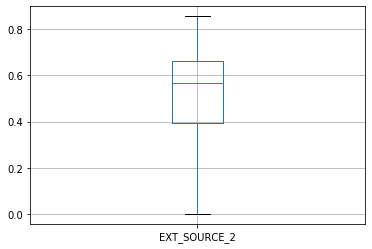

In [67]:
df1.boxplot(column=['EXT_SOURCE_2'])
plt.show()

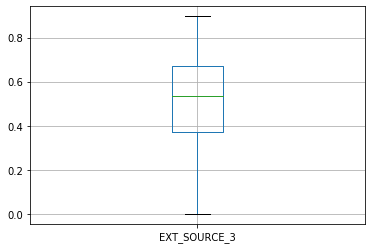

In [68]:
df1.boxplot(column=['EXT_SOURCE_3'])
plt.show()

### Observation : There are seems to be no oulier for both EXT_SOURCE_2 as well as EXT_SOURCE_3 so imputing missing values with mean would be appropriate.

# Few More Analysis

#### Let us analyse the 4 columns named DAYS_BIRTH/DAYS_EMPLOYED/DAYS_REGISTRATION/DAYS_ID_PUBLISH

In [70]:
df1[['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373
std,4363.988632,141275.766519,3522.886321,1509.450419
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000
max,-7489.000000,365243.000000,0.000000,0.000000


### The above shows that DAYS_BIRTH is all negative as it may have happened that it was entered against current application date.
We need to make all the values positive and convert it into years for better understanding.

Similarly for other fields all the negative values need to be converted to positive and then to years for better understanding.

In [37]:
# Take absolute value by applying abs() function and divide by 365 to get the number of years.
# After converting into years store them in different set of columns.

df1['YEARS_BIRTH'] = round(df1.DAYS_BIRTH.abs()/365)
df1['YEARS_EMPLOYED'] = round(df1.DAYS_EMPLOYED.abs()/365)
df1['YEARS_REGISTRATION'] = round(df1.DAYS_REGISTRATION.abs()/365)
df1['YEARS_ID_PUBLISH'] = round(df1.DAYS_ID_PUBLISH.abs()/365)

In [38]:
# Drop those 4 original columns as we have years_* fields available.
df1.drop(columns=['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH'],inplace = True)

In [39]:
df1[['YEARS_BIRTH' ,'YEARS_EMPLOYED' ,'YEARS_REGISTRATION' ,'YEARS_ID_PUBLISH']].describe()

,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.938646,185.608021,13.659440,8.198575
std,11.964047,382.165887,9.659369,4.151520
min,21.000000,0.000000,0.000000,0.000000
25%,34.000000,3.000000,6.000000,5.000000
50%,43.000000,6.000000,12.000000,9.000000
75%,54.000000,16.000000,20.000000,12.000000
max,69.000000,1001.000000,68.000000,20.000000


### Observation : Years_Employed is 1001 which does not look like a possible case. This is an outlier value and can be replaced with NULL.

In [15]:
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

Seeing the above list we found that there are many FLAG_DOCUMENT_* fields that can be deleted as those does not give any indication whether they will default or not.

In [59]:
NotReq_cols = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [60]:
df1.drop(columns = NotReq_cols,inplace =True)

In [121]:
# CODE_GENDER

df1.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

 ## observation : CODE_GENDER is a categorical column and it contains 4 records with XNA which can be imputed with mode value 'F'

In [12]:
# CNT_FAM_MEMBERS
df1.CNT_FAM_MEMBERS.value_counts(normalize = True) * 100

2.0     51.496704
1.0     22.063419
3.0     17.105516
4.0      8.031310
5.0      1.131024
6.0      0.132679
7.0      0.026341
8.0      0.006504
9.0      0.001951
10.0     0.000976
14.0     0.000650
16.0     0.000650
12.0     0.000650
20.0     0.000650
11.0     0.000325
13.0     0.000325
15.0     0.000325
Name: CNT_FAM_MEMBERS, dtype: float64

In [104]:
df1.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

### Observations: We can impute NULL with median value which is 2 to CNT_FAM_MEMBERS as mean is a fraction which cannot be applied to count family members as thats not possible to have fractional value.

In [13]:
df1.ORGANIZATION_TYPE.value_counts(normalize=True)

Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

In [15]:
df1[(df1.ORGANIZATION_TYPE == 'XNA') & ~(df1.NAME_INCOME_TYPE == 'Pensioner')]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1156,101358,0,Revolving loans,F,N,N,0,337500.0,585000.0,29250.0,585000.0,Unaccompanied,Unemployed,Higher education,Single / not married,House / apartment,0.020713,-13964,365243,-115.0,-4746,1,0,0,1,0,0,NaN,1.0,3,3,FRIDAY,5,0,0,0,0,0,0,XNA,0.105875,0.824595,NaN,NaN,NaN,NaN,-325.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3937,104600,0,Revolving loans,F,N,Y,2,135000.0,270000.0,13500.0,270000.0,Unaccompanied,Unemployed,Secondary / secondary special,Widow,House / apartment,0.018029,-15947,365243,-4219.0,-4212,1,0,0,1,0,0,NaN,3.0,3,2,MONDAY,11,0,0,0,0,0,0,XNA,0.617056,0.420611,2.0,0.0,2.0,0.0,-49.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
23834,127729,1,Cash loans,F,N,Y,0,99000.0,783000.0,22306.5,783000.0,Unaccompanied,Unemployed,Secondary / secondary special,Widow,House / apartment,0.018209,-23692,365243,-5661.0,-4715,1,0,0,1,0,0,NaN,1.0,3,3,TUESDAY,14,0,0,0,0,0,0,XNA,0.006939,NaN,0.0,0.0,0.0,0.0,-1436.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
35352,140949,0,Cash loans,F,N,N,0,56250.0,1530000.0,54954.0,1530000.0,Unaccompanied,Unemployed,Secondary / secondary special,Single / not married,House / apartment,0.011703,-17418,365243,-5086.0,-951,1,0,0,1,0,0,NaN,1.0,2,2,MONDAY,12,0,0,0,0,0,0,XNA,0.585243,NaN,3.0,0.0,2.0,0.0,-1169.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
37512,143454,1,Cash loans,M,Y,Y,0,31500.0,585000.0,26892.0,585000.0,Unaccompanied,Unemployed,Secondary / secondary special,Married,House / apartment,0.025164,-12403,365243,-27.0,-866,1,0,0,1,1,1,NaN,2.0,2,2,MONDAY,11,0,0,0,0,0,0,XNA,0.276265,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
41723,148306,0,Revolving loans,F,N,Y,0,270000.0,135000.0,6750.0,135000.0,Unaccompanied,Unemployed,Incomplete higher,Single / not married,Rented apartment,0.014464,-10079,365243,-4340.0,-2484,1,0,0,1,0,0,NaN,1.0,2,2,THURSDAY,19,1,0,0,0,0,0,XNA,0.600470,NaN,0.0,0.0,0.0,0.0,-529.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
77179,189489,0,Cash loans,F,N,N,1,54000.0,634500.0,23643.0,634500.0,Unaccompanied,Unemployed,Higher education,Civil marriage,House / apartment,0.020713,-13456,365243,-7167.0,-4182,1,0,0,1,0,0,NaN,3.0,3,2,MONDAY,13,0,0,0,0,0,0,XNA,0.647398,NaN,0.0,0.0,0.0,0.0,-685.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
78336,190812,1,Cash loans,F,N,Y,0,45000.0,328500.0,10629.0,328500.0,Unaccompanied,Unemployed,Secondary / secondary special,Single / not married,House / apartment,0.014520,-22810,365243,-8549.0,-4268,1,0,0,1,0,0,NaN,1.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,XNA,0.428753,NaN,0.0,0.0,0.0

### Observation: The above data shows that the rows where OCCUPATION_TYPE is XNA are mostly pensioners or unemployed so we can impute XNA values to 'NULL' or can be put as 'Unknown/Not Applicable'

In [77]:
df1[df1.YEARS_EMPLOYED.isna()]


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,1,0,0,1,0,0,Unknown,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Unknown,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,55.0,NaN,20.0,10.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,1,0,0,1,1,0,Unknown,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,Unknown,0.555183,0.652897,0.0,0.0,0.0,0.0,-2396.0,0.0,0.0,0.0,0.0,0.0,2.0,56.0,NaN,14.0,7.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,1,0,0,1,1,0,Unknown,2.0,3,3,FRIDAY,12,0,0,0,0,0,0,Unknown,0.624305,0.669057,0.0,0.0,0.0,0.0,-795.0,0.0,0.0,0.0,0.0,0.0,3.0,68.0,NaN,25.0,10.0
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006207,1,0,0,1,1,0,Unknown,2.0,2,2,FRIDAY,11,0,0,0,0,0,0,Unknown,0.650765,0.751724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,66.0,NaN,27.0,14.0
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,675000.0,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.010966,1,0,0,1,0,0,Unknown,1.0,2,2,WEDNESDAY,9,0,0,0,0,0,0,Unknown,0.766138,0.684828,0.0,0.0,0.0,0.0,-491.0,0.0,0.0,0.0,0.0,0.0,3.0,65.0,NaN,16.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,607500.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.031329,1,0,0,1,0,0,Unknown,1.0,2,2,MONDAY,15,0,0,0,0,0,0,Unknown,0.195625,0.360613,11.0,2.0,11.0,0.0,-1667.0,0.0,0.0,0.0,1.0,0.0,0.0,61.0,NaN,33.0,11.0
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.007330,1,0,0,1,0,0,Unknown,1.0,2,2,MONDAY,12,0,0,0,0,0,0,Unknown,0.589906,0.520898,1.0,1.0,1.0,1.0,-1775.0,0.0,0.0,0.0,0.0,0.0,5.0,68.0,NaN,31.0,12.0
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,936000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.010147,1,0,0,1,0,0,Unknown,2.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Unknown,0.307082,0.255332,0.0,0.0,0.0,0.0,-846.0,0.0,0.0,0.0,0.0,1.0,8.0,63.0,NaN,15.0,11.0
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.022800,1,0,0,1,1,0,Unknown,1.0,2,2,MONDAY,15,0,0,0,0,0,0,Unknown,0.346391,0.742182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,67.0,NaN,20.0,6.0


In [78]:
df1[(df1.YEARS_EMPLOYED.isna()) & (df1.NAME_INCOME_TYPE != 'Pensioner')]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
1156,101358,0,Revolving loans,F,N,N,0,337500.0,585000.0,29250.0,585000.0,Unaccompanied,Unemployed,Higher education,Single / not married,House / apartment,0.020713,1,0,0,1,0,0,Unknown,1.0,3,3,FRIDAY,5,0,0,0,0,0,0,Unknown,0.105875,0.824595,NaN,NaN,NaN,NaN,-325.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,NaN,0.0,13.0
3937,104600,0,Revolving loans,F,N,Y,2,135000.0,270000.0,13500.0,270000.0,Unaccompanied,Unemployed,Secondary / secondary special,Widow,House / apartment,0.018029,1,0,0,1,0,0,Unknown,3.0,3,2,MONDAY,11,0,0,0,0,0,0,Unknown,0.617056,0.420611,2.0,0.0,2.0,0.0,-49.0,0.0,0.0,0.0,0.0,1.0,2.0,44.0,NaN,12.0,12.0
23834,127729,1,Cash loans,F,N,Y,0,99000.0,783000.0,22306.5,783000.0,Unaccompanied,Unemployed,Secondary / secondary special,Widow,House / apartment,0.018209,1,0,0,1,0,0,Unknown,1.0,3,3,TUESDAY,14,0,0,0,0,0,0,Unknown,0.006939,NaN,0.0,0.0,0.0,0.0,-1436.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,NaN,16.0,13.0
35352,140949,0,Cash loans,F,N,N,0,56250.0,1530000.0,54954.0,1530000.0,Unaccompanied,Unemployed,Secondary / secondary special,Single / not married,House / apartment,0.011703,1,0,0,1,0,0,Unknown,1.0,2,2,MONDAY,12,0,0,0,0,0,0,Unknown,0.585243,NaN,3.0,0.0,2.0,0.0,-1169.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,NaN,14.0,3.0
37512,143454,1,Cash loans,M,Y,Y,0,31500.0,585000.0,26892.0,585000.0,Unaccompanied,Unemployed,Secondary / secondary special,Married,House / apartment,0.025164,1,0,0,1,1,1,Unknown,2.0,2,2,MONDAY,11,0,0,0,0,0,0,Unknown,0.276265,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,NaN,0.0,2.0
41723,148306,0,Revolving loans,F,N,Y,0,270000.0,135000.0,6750.0,135000.0,Unaccompanied,Unemployed,Incomplete higher,Single / not married,Rented apartment,0.014464,1,0,0,1,0,0,Unknown,1.0,2,2,THURSDAY,19,1,0,0,0,0,0,Unknown,0.600470,NaN,0.0,0.0,0.0,0.0,-529.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,NaN,12.0,7.0
77179,189489,0,Cash loans,F,N,N,1,54000.0,634500.0,23643.0,634500.0,Unaccompanied,Unemployed,Higher education,Civil marriage,House / apartment,0.020713,1,0,0,1,0,0,Unknown,3.0,3,2,MONDAY,13,0,0,0,0,0,0,Unknown,0.647398,NaN,0.0,0.0,0.0,0.0,-685.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,NaN,20.0,11.0
78336,190812,1,Cash loans,F,N,Y,0,45000.0,328500.0,10629.0,328500.0,Unaccompanied,Unemployed,Secondary / secondary special,Single / not married,House / apartment,0.014520,1,0,0,1,0,0,Unknown,1.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Unknown,0.428753,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,NaN,23.0,12.0
80704,193571,1,Cash loans,F,N,Y,0,90000.0,571500.0,20524.5,571500.0,Unaccompanied,Unemployed,Secondary / secondary special,Married,House / apartment,0.035792,1,0,0,1,0,0,Unknown,2.0,2,2,FRIDAY,10,0,0,0,0,0,0,Unknown,0.698729,NaN,3.0,2.0,3.0,2.0,-1412.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,NaN,33.0,11.0
92061,206901,0,Revolving loans,M,Y,Y,0,270000.0,855000.0,42750.0,855000.0,Unaccompanied,Unemployed,Higher education,Single / not married,House / apartment,0.019689,1,0,0,1,0,0,Unknown,1.0,2,2,THURSDAY,10,0,0,0,0,0,0,Unknown,0.399796,0.321735,NaN,NaN,NaN,NaN,-326.0,0.0,0.0,0.0,0.0,0.0,0.

In [108]:
df1[(df1.YEARS_EMPLOYED.isna()) & (df1.NAME_INCOME_TYPE == 'Pensioner')].agg('count') 
# 55352 (penslioner) + 22 (unemployed) = 55374 (total null)

SK_ID_CURR                     55352
TARGET                         55352
NAME_CONTRACT_TYPE             55352
CODE_GENDER                    55352
FLAG_OWN_CAR                   55352
FLAG_OWN_REALTY                55352
CNT_CHILDREN                   55352
AMT_INCOME_TOTAL               55352
AMT_CREDIT                     55352
AMT_ANNUITY                    55352
AMT_GOODS_PRICE                55330
NAME_TYPE_SUITE                55352
NAME_INCOME_TYPE               55352
NAME_EDUCATION_TYPE            55352
NAME_FAMILY_STATUS             55352
NAME_HOUSING_TYPE              55352
REGION_POPULATION_RELATIVE     55352
FLAG_MOBIL                     55352
FLAG_EMP_PHONE                 55352
FLAG_WORK_PHONE                55352
FLAG_CONT_MOBILE               55352
FLAG_PHONE                     55352
FLAG_EMAIL                     55352
OCCUPATION_TYPE                55352
CNT_FAM_MEMBERS                55352
REGION_RATING_CLIENT           55352
REGION_RATING_CLIENT_W_CITY    55352
W

The above shows that the null values in YEARS_EMPLOYED is due to those customers are either unemployed or pensioners.The rows can be left as Null.

In [167]:
df1.LIVE_CITY_NOT_WORK_CITY.value_counts()

0    252295
1     55215
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64

REG_REGION_NOT_LIVE_REGION   307510 non-null  int64  
REG_REGION_NOT_WORK_REGION   307510 non-null  int64  
LIVE_REGION_NOT_WORK_REGION  307510 non-null  int64  
REG_CITY_NOT_LIVE_CITY       307510 non-null  int64  
REG_CITY_NOT_WORK_CITY       307510 non-null  int64  
LIVE_CITY_NOT_WORK_CITY

Correcting datatype for CNT_FAM_MEMBERS by changing from float to int as count column cannot be a float.

In [168]:
df1.CNT_FAM_MEMBERS.value_counts()

2.0     158358
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

### Count of Family members column datatype needs to be changed to int64 as count cannot be a float field.
df1.CNT_FAM_MEMBERS= df1.CNT_FAM_MEMBERS.astype('int64')

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [177]:
df1.WEEKDAY_APPR_PROCESS_START.value_counts()

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50337
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [42]:
df1.FLAG_MOBIL=df1.FLAG_MOBIL.astype('str')
df1.FLAG_EMP_PHONE=df1.FLAG_EMP_PHONE.astype('str')
df1.FLAG_WORK_PHONE=df1.FLAG_WORK_PHONE.astype('str')
df1.FLAG_CONT_MOBILE=df1.FLAG_CONT_MOBILE.astype('str')
df1.FLAG_PHONE=df1.FLAG_PHONE.astype('str')
df1.FLAG_EMAIL=df1.FLAG_EMAIL.astype('str')

### Changing the flag fields to Y and N for better understanding

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [180]:
df1.FLAG_MOBIL.value_counts()

1    307510
Name: FLAG_MOBIL, dtype: int64

In [181]:
df1.FLAG_EMP_PHONE.value_counts()

1    252124
0     55386
Name: FLAG_EMP_PHONE, dtype: int64

In [182]:
df1.FLAG_WORK_PHONE.value_counts()

0    246202
1     61308
Name: FLAG_WORK_PHONE, dtype: int64

In [183]:
df1.FLAG_CONT_MOBILE.value_counts()

1    306936
0       574
Name: FLAG_CONT_MOBILE, dtype: int64

In [184]:
df1.FLAG_PHONE.value_counts()

0    221079
1     86431
Name: FLAG_PHONE, dtype: int64

In [191]:
df1.FLAG_EMAIL.value_counts()

N    290068
Y     17442
Name: FLAG_EMAIL, dtype: int64

In [188]:
df1.FLAG_MOBIL.replace('1','Y',inplace = True)

In [44]:
df1.FLAG_EMP_PHONE.replace('1','Y',inplace = True)
df1.FLAG_EMP_PHONE.replace('0','N',inplace = True)
df1.FLAG_WORK_PHONE.replace('1','Y',inplace = True)
df1.FLAG_WORK_PHONE.replace('0','N',inplace = True)
df1.FLAG_CONT_MOBILE.replace('1','Y',inplace = True)
df1.FLAG_CONT_MOBILE.replace('0','N',inplace = True)
df1.FLAG_PHONE.replace('1','Y',inplace = True)
df1.FLAG_PHONE.replace('0','N',inplace = True)
df1.FLAG_EMAIL.replace('0','N',inplace = True)
df1.FLAG_EMAIL.replace('1','Y',inplace = True)

### Changing the below columns values to more appropriate value for better understanding.
1 -> Different,
0 -> Same

REG_REGION_NOT_LIVE_REGION,
REG_REGION_NOT_WORK_REGION,
LIVE_REGION_NOT_WORK_REGION,
REG_CITY_NOT_LIVE_CITY,
REG_CITY_NOT_WORK_CITY,
LIVE_CITY_NOT_WORK_CITY


In [192]:
df1.REG_REGION_NOT_LIVE_REGION.value_counts()

0    302853
1      4657
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

In [194]:
df1.REG_REGION_NOT_WORK_REGION.value_counts()

0    291898
1     15612
Name: REG_REGION_NOT_WORK_REGION, dtype: int64

In [195]:
df1.LIVE_REGION_NOT_WORK_REGION.value_counts()

0    295007
1     12503
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64

In [197]:
df1.REG_CITY_NOT_LIVE_CITY.value_counts()

0    283471
1     24039
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64

In [199]:
df1.REG_CITY_NOT_WORK_CITY.value_counts()

0    236643
1     70867
Name: REG_CITY_NOT_WORK_CITY, dtype: int64

In [200]:
df1.LIVE_CITY_NOT_WORK_CITY.value_counts()

0    252295
1     55215
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64

In [204]:
df1.REG_REGION_NOT_LIVE_REGION.value_counts()


0    302853
1      4657
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

### Changing the datatype of below flag fields to string and then changing the value.

In [52]:
df1.REG_REGION_NOT_LIVE_REGION = df1.REG_REGION_NOT_LIVE_REGION.astype(str)
df1.REG_REGION_NOT_WORK_REGION = df1.REG_REGION_NOT_WORK_REGION.astype(str)
df1.LIVE_REGION_NOT_WORK_REGION = df1.LIVE_REGION_NOT_WORK_REGION.astype(str)
df1.REG_CITY_NOT_LIVE_CITY = df1.REG_CITY_NOT_LIVE_CITY.astype(str)
df1.REG_CITY_NOT_WORK_CITY = df1.REG_CITY_NOT_WORK_CITY.astype(str)
df1.LIVE_CITY_NOT_WORK_CITY = df1.LIVE_CITY_NOT_WORK_CITY.astype(str)


In [53]:
df1.REG_REGION_NOT_LIVE_REGION.replace('1','Different',inplace = True)
df1.REG_REGION_NOT_LIVE_REGION.replace('0','Same',inplace = True)
df1.REG_REGION_NOT_WORK_REGION.replace('1','Different',inplace = True)
df1.REG_REGION_NOT_WORK_REGION.replace('0','Same',inplace = True)
df1.LIVE_REGION_NOT_WORK_REGION.replace('0','Same',inplace = True)
df1.LIVE_REGION_NOT_WORK_REGION.replace('1','Different',inplace = True)
df1.REG_CITY_NOT_LIVE_CITY.replace('1','Different',inplace = True)
df1.REG_CITY_NOT_LIVE_CITY.replace('0','Same',inplace = True)
df1.REG_CITY_NOT_WORK_CITY.replace('1','Different',inplace = True)
df1.REG_CITY_NOT_WORK_CITY.replace('0','Same',inplace = True)
df1.LIVE_CITY_NOT_WORK_CITY.replace('1','Different',inplace = True)
df1.LIVE_CITY_NOT_WORK_CITY.replace('0','Same',inplace = True)

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [56]:
### Just checking one of the fields 
df1.REG_REGION_NOT_LIVE_REGION.value_counts()

Same         302854
Different      4657
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

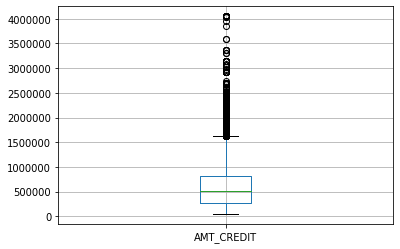

In [62]:
# Checking outlier in 'AMT_CREDIT'

df1.boxplot(column=['AMT_CREDIT'])
plt.show()

### The above boxplot shows that there are outliers in AMT_CREDIT.

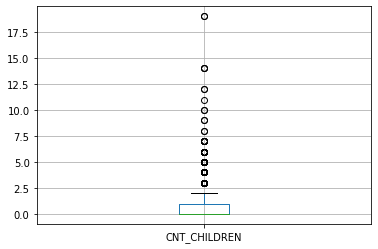

In [68]:
# Checking outlier in 'CNT_CHILDREN'

df1.boxplot(column=['CNT_CHILDREN'])
plt.show()


### Above box plot for CNT_CHILDREN shows outlier which is 19. There is a highly less chance for a family to have 19 children.

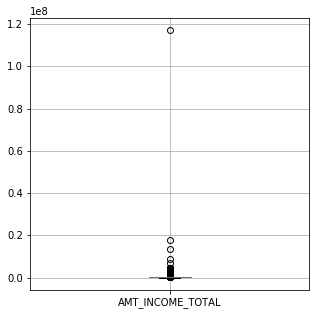

In [80]:
# Checking outlier in 'CNT_CHILDREN'
plt.figure(figsize=(5,5)); 
df1.boxplot(column=['AMT_INCOME_TOTAL'])
plt.show()

In [75]:
df1.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [147]:
df1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCL

### The above shows that the maximum value is much bigger than mean and median which means there are outliers in AMT_INCOME_TOTAL field.

### Let us choose between 30 to 40 columns for our final analysis purpose.

In [148]:
df2_final = df1.filter(['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_EMAIL',                                         
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE'])

In [149]:
df2_final.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26.0,2.0,10.0,6.0,Laborers,1.0,1,Y,N,Y,N,2,2,WEDNESDAY,10,Same,Same,Same,Same,Business Entity Type 3,0.262949,0.139376,1134.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,46.0,3.0,3.0,1.0,Core staff,2.0,1,Y,N,Y,N,1,1,MONDAY,11,Same,Same,Same,Same,School,0.622246,NaN,828.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.0,1.0,12.0,7.0,Laborers,1.0,1,Y,Y,Y,N,2,2,MONDAY,9,Same,Same,Same,Same,Government,0.555912,0.729567,815.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.0,8.0,27.0,7.0,Laborers,2.0,1,Y,N,Y,N,2,2,WEDNESDAY,17,Same,Same,Same,Same,Business Entity Type 3,0.650442,NaN,617.0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,55.0,8.0,12.0,9.0,Core staff,1.0,1,Y,N,Y,N,2,2,THURSDAY,11,Same,Same,Same,Different,Religion,0.322738,NaN,1106.0


In [88]:
df2_final.shape

(307511, 35)

In [151]:
df2_final.YEARS_BIRTH.describe()

count    307511.000000
mean         43.938646
std          11.964047
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64

#### Binning

In [152]:
df2_final['AGE_bins'] = pd.cut(df2_final.YEARS_BIRTH, bins = [18,30, 50, 80], labels = ['Young', 'Middle Age', 'Senior- citizen'])

In [153]:
df2_final.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AGE_bins
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26.0,2.0,10.0,6.0,Laborers,1.0,1,Y,N,Y,N,2,2,WEDNESDAY,10,Same,Same,Same,Same,Business Entity Type 3,0.262949,0.139376,1134.0,Young
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,46.0,3.0,3.0,1.0,Core staff,2.0,1,Y,N,Y,N,1,1,MONDAY,11,Same,Same,Same,Same,School,0.622246,NaN,828.0,Middle Age
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.0,1.0,12.0,7.0,Laborers,1.0,1,Y,Y,Y,N,2,2,MONDAY,9,Same,Same,Same,Same,Government,0.555912,0.729567,815.0,Senior- citizen
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.0,8.0,27.0,7.0,Laborers,2.0,1,Y,N,Y,N,2,2,WEDNESDAY,17,Same,Same,Same,Same,Business Entity Type 3,0.650442,NaN,617.0,Senior- citizen
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,55.0,8.0,12.0,9.0,Core staff,1.0,1,Y,N,Y,N,2,2,THURSDAY,11,Same,Same,Same,Different,Religion,0.322738,NaN,1106.0,Senior- citizen


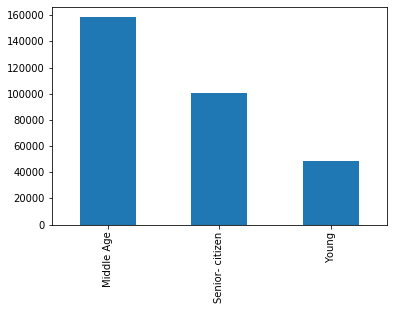

In [155]:
df2_final.AGE_bins.value_counts().plot(kind = 'bar')
plt.show()

#### Observation : Middle - Age people have higher counts for loan application than young and senior citizens.

In [157]:
df2_final.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [172]:
df2_final['INCOME_bins'] = pd.qcut(df2_final.AMT_INCOME_TOTAL,q=[0,0.20,0.50,0.85,1],labels=['Low','Medium','High','Very-High'])

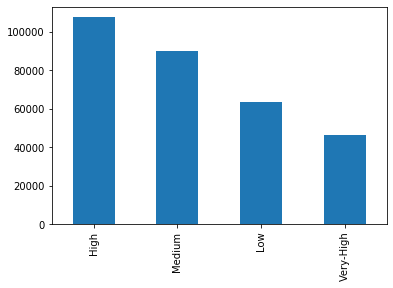

In [175]:
df2_final.INCOME_bins.value_counts().plot(kind = 'bar')
plt.show()

#### Observation : Higher salaried people have higher counts for loan application than other income range people. People with very high income has lowest count of loan applications as its evident also because they will have enough money to fund themselves.

In [174]:
df2_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   TARGET                       307511 non-null  int64   
 1   NAME_CONTRACT_TYPE           307511 non-null  object  
 2   CODE_GENDER                  307511 non-null  object  
 3   FLAG_OWN_CAR                 307511 non-null  object  
 4   FLAG_OWN_REALTY              307511 non-null  object  
 5   CNT_CHILDREN                 307511 non-null  int64   
 6   AMT_INCOME_TOTAL             307511 non-null  float64 
 7   AMT_CREDIT                   307511 non-null  float64 
 8   AMT_ANNUITY                  307499 non-null  float64 
 9   AMT_GOODS_PRICE              307233 non-null  float64 
 10  NAME_TYPE_SUITE              306219 non-null  object  
 11  NAME_INCOME_TYPE             307511 non-null  object  
 12  NAME_EDUCATION_TYPE          307511 non-null

In [89]:
### Check Data Imbalance

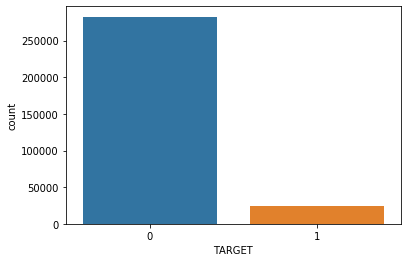

In [91]:
Target_imbalance= sns.countplot('TARGET',data =df2_final)

We can see there is a huge imbalance in out Target variable. So we can separate the Target variable into two different dataframes Client_Default and Client_noDefault based on target variable values.

In [225]:
Client_noDefault = df2_final[df2_final.TARGET == 0]
Client_Default = df2_final[df2_final.TARGET == 1]

In [96]:
# To check which all columns are categorical
df2_final.nunique().sort_values()

TARGET                              2
FLAG_WORK_PHONE                     2
FLAG_EMP_PHONE                      2
FLAG_MOBIL                          2
FLAG_CONT_MOBILE                    2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
FLAG_EMAIL                          2
REG_CITY_NOT_WORK_CITY              2
FLAG_OWN_REALTY                     2
FLAG_OWN_CAR                        2
NAME_CONTRACT_TYPE                  2
REG_CITY_NOT_LIVE_CITY              2
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
CODE_GENDER                         3
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
NAME_TYPE_SUITE                     7
WEEKDAY_APPR_PROCESS_START          7
NAME_INCOME_TYPE                    8
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
HOUR_APPR_PROCESS_START            24
ORGANIZATION

## Univariate Analysis

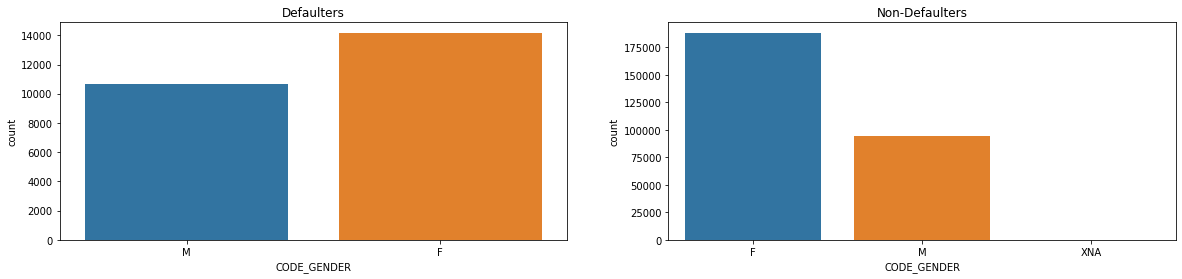

In [98]:
## Univariate for categorical
## Gender Distribution

plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.countplot(Client_Default.CODE_GENDER)

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.countplot(Client_noDefault.CODE_GENDER)

plt.show()

#### Observation: Comparing the Payment Difficulties and Non Payment Difficulties on the basis of Gender, we observe that Females are much better in terms of repaying the loans. Although females count is more in both the cases than males however there is an increase in percentage of Male Payment Difficulties from Non-Payment Difficulties.

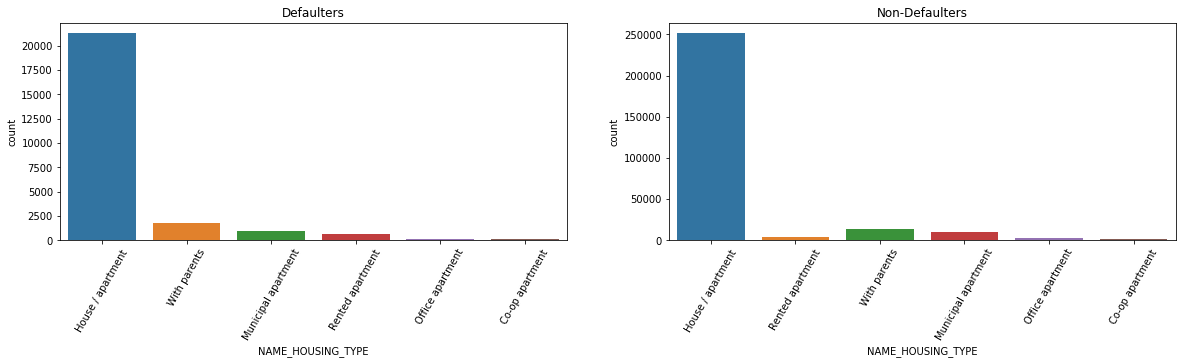

In [108]:
## Univariate for categorical
## Housing Type Distribution

plt.figure(figsize = (20,4))

plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xticks(rotation=60)
sns.countplot(Client_Default.NAME_HOUSING_TYPE)

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
plt.xticks(rotation=60)
sns.countplot(Client_noDefault.NAME_HOUSING_TYPE)
plt.show()

In [111]:
Client_Default.NAME_HOUSING_TYPE.value_counts(normalize=True) *100

House / apartment      85.687815
With parents            6.992951
Municipal apartment     3.846928
Rented apartment        2.420947
Office apartment        0.692850
Co-op apartment         0.358510
Name: NAME_HOUSING_TYPE, dtype: float64

In [112]:
Client_noDefault.NAME_HOUSING_TYPE.value_counts(normalize=True)*100

House / apartment      89.001931
With parents            4.635532
Municipal apartment     3.618149
Rented apartment        1.514047
Office apartment        0.864917
Co-op apartment         0.365423
Name: NAME_HOUSING_TYPE, dtype: float64

#### Observation: Population living in Rented apartments and those who are living with parents have higher default rate as they have higher proportion in the Defaulted population as compared to non defaulted population. 

It may be due to rent as well as living with parents can be the reason that the savings is not too high due to which they are having difficulty in loan repayment.

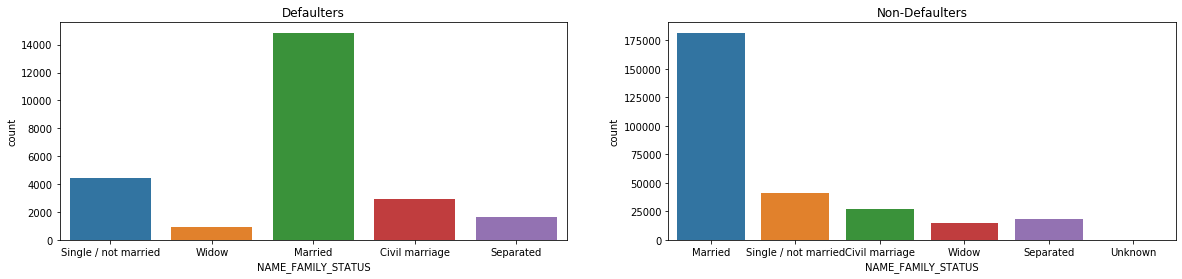

In [113]:
## Univariate for categorical
## Family Status Distribution

plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.countplot(Client_Default.NAME_FAMILY_STATUS)

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.countplot(Client_noDefault.NAME_FAMILY_STATUS)

plt.show()

In [123]:
Client_Default.NAME_FAMILY_STATUS.value_counts(normalize = True)*100

Married                 59.818731
Single / not married    17.953676
Civil marriage          11.927492
Separated                6.525680
Widow                    3.774421
Name: NAME_FAMILY_STATUS, dtype: float64

In [115]:
Client_noDefault.NAME_FAMILY_STATUS.value_counts(normalize = True)*100

Married                 64.234522
Single / not married    14.499126
Civil marriage           9.485436
Separated                6.420551
Widow                    5.359657
Unknown                  0.000707
Name: NAME_FAMILY_STATUS, dtype: float64

#### Observation : Single/ not married is proportionally higher in dafaulted population as compared to non defaulted population. This indicates that those who are Single/ not married are tend to defaults.


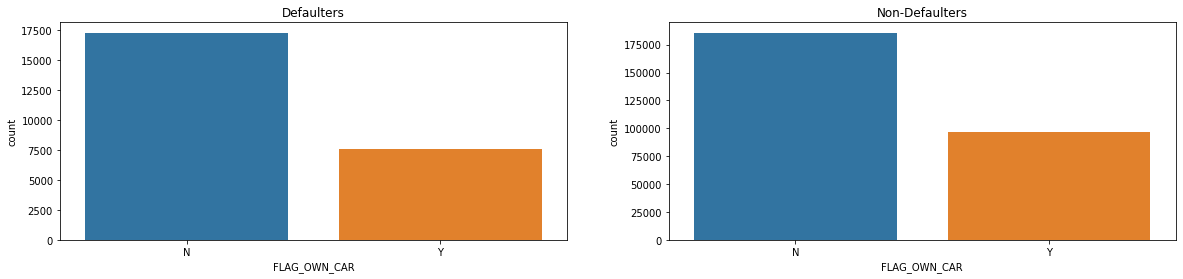

In [126]:
## Univariate for categorical
## Flag Own Car  Distribution

plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.countplot(Client_Default.FLAG_OWN_CAR)

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.countplot(Client_noDefault.FLAG_OWN_CAR)

plt.show()

In [124]:
Client_noDefault.FLAG_OWN_CAR.value_counts(normalize = True)*100

N    65.682418
Y    34.317582
Name: FLAG_OWN_CAR, dtype: float64

In [125]:
Client_Default.FLAG_OWN_CAR.value_counts(normalize = True)*100

N    69.482377
Y    30.517623
Name: FLAG_OWN_CAR, dtype: float64

#### Observation : Clients who does not own any car is proportionally higher in dafaulted population as compared to non defaulted population.The reason might be that they have good income.

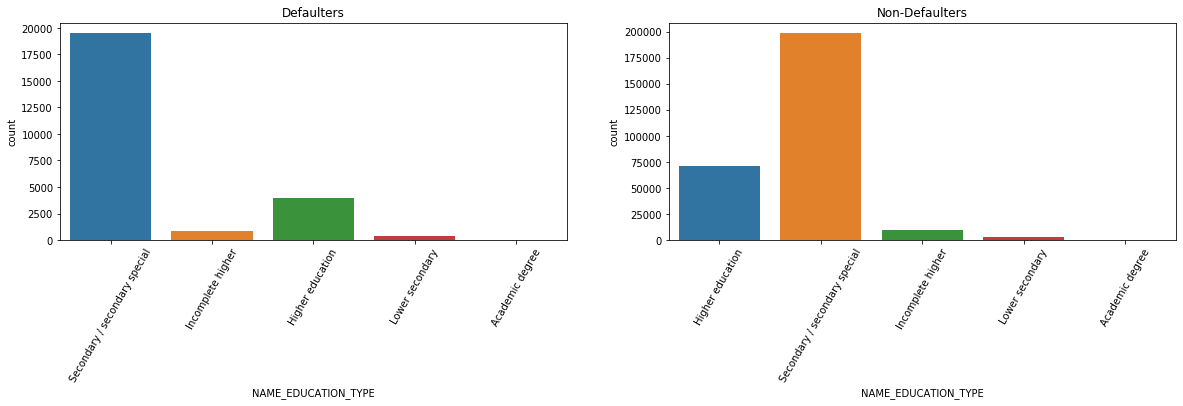

In [131]:
## Univariate for categorical
## Education type  Distribution

plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xticks(rotation=60)
sns.countplot(Client_Default.NAME_EDUCATION_TYPE)

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
plt.xticks(rotation=60)
sns.countplot(Client_noDefault.NAME_EDUCATION_TYPE)

plt.show()

In [132]:
Client_noDefault.NAME_EDUCATION_TYPE.value_counts(normalize = True)*100

Secondary / secondary special    70.349080
Higher education                 25.064559
Incomplete higher                 3.327013
Lower secondary                   1.202394
Academic degree                   0.056954
Name: NAME_EDUCATION_TYPE, dtype: float64

In [134]:
Client_Default.NAME_EDUCATION_TYPE.value_counts(normalize = True)*100

Secondary / secondary special    78.646526
Higher education                 16.149043
Incomplete higher                 3.512588
Lower secondary                   1.679758
Academic degree                   0.012085
Name: NAME_EDUCATION_TYPE, dtype: float64

#### Observation: Those who have done Higher education is proportionally lesser in dafaulted population as compared to non defaulted population.The reason might be that they have good income.Also those who have done Secondary / secondary special education is proportionally higher in dafaulted population as compared to non defaulted population.

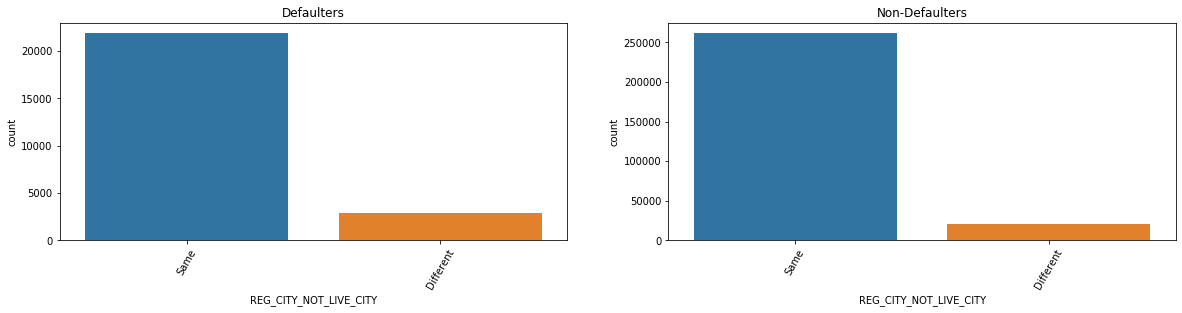

In [137]:
## Univariate for categorical
## REG_CITY_NOT_LIVE_CITY  Distribution

plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xticks(rotation=60)
sns.countplot(Client_Default.REG_CITY_NOT_LIVE_CITY)

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
plt.xticks(rotation=60)
sns.countplot(Client_noDefault.REG_CITY_NOT_LIVE_CITY)

plt.show()

In [135]:
Client_Default.REG_CITY_NOT_LIVE_CITY.value_counts(normalize = True)*100

Same         88.161128
Different    11.838872
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64

In [136]:
Client_noDefault.REG_CITY_NOT_LIVE_CITY.value_counts(normalize = True)*100

Same         92.535888
Different     7.464112
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64

#### Observation: Those whose permanent address does not match with contact address is proportionally higher in defaulted population as compared to non defaulted population.The reason might be that they do some fraud.

In [138]:
Client_Default.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET                       24825 non-null  int64  
 1   NAME_CONTRACT_TYPE           24825 non-null  object 
 2   CODE_GENDER                  24825 non-null  object 
 3   FLAG_OWN_CAR                 24825 non-null  object 
 4   FLAG_OWN_REALTY              24825 non-null  object 
 5   CNT_CHILDREN                 24825 non-null  int64  
 6   AMT_INCOME_TOTAL             24825 non-null  float64
 7   AMT_CREDIT                   24825 non-null  float64
 8   AMT_ANNUITY                  24825 non-null  float64
 9   AMT_GOODS_PRICE              24804 non-null  float64
 10  NAME_TYPE_SUITE              24755 non-null  object 
 11  NAME_INCOME_TYPE             24825 non-null  object 
 12  NAME_EDUCATION_TYPE          24825 non-null  object 
 13  NAME_FAMILY_STA

In [194]:
## Univariate for continuos
def plot_continous(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.distplot(Client_noDefault[var], hist = False, label = 'Distribution for Non-Defaulters')
    plt.xticks(rotation=90)
    plt.xlabel(var)
    
    plt.subplot(1, 2, 2)
    sns.distplot(Client_Default[var], hist = False, label = 'Distribution for Defaulters')
    plt.xticks(rotation=90)
    plt.xlabel(var)
    
    plt.show()


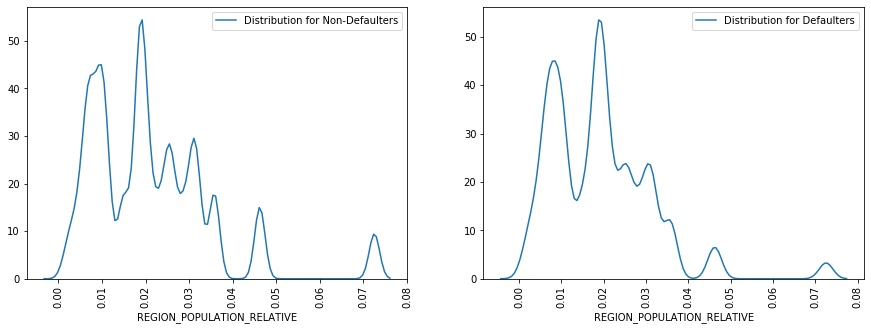

In [195]:
plot_continous('REGION_POPULATION_RELATIVE')

#### People who are living in higher density areas are tend to lesser defaults.



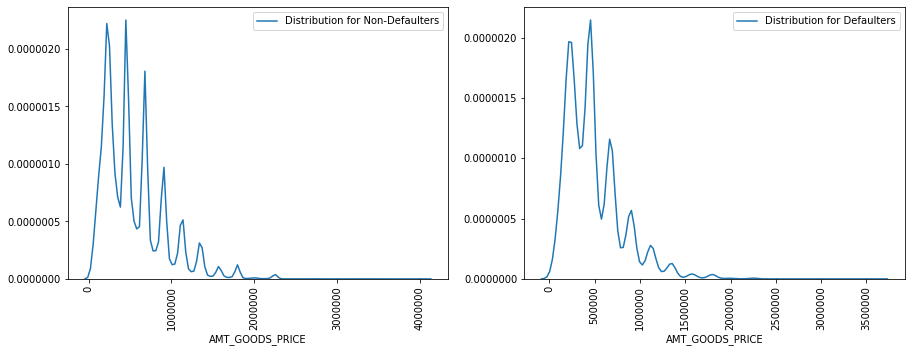

In [196]:
plot_continous('AMT_GOODS_PRICE')

#### Defaults are higher for amount of the goods for which the loan is given is less.(between 0 to 500000)

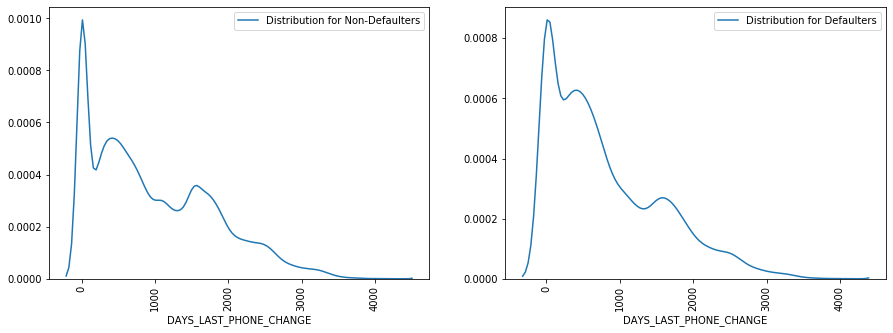

In [197]:
plot_continous('DAYS_LAST_PHONE_CHANGE')

#### Defaulters are more in case days since last phone change is less.

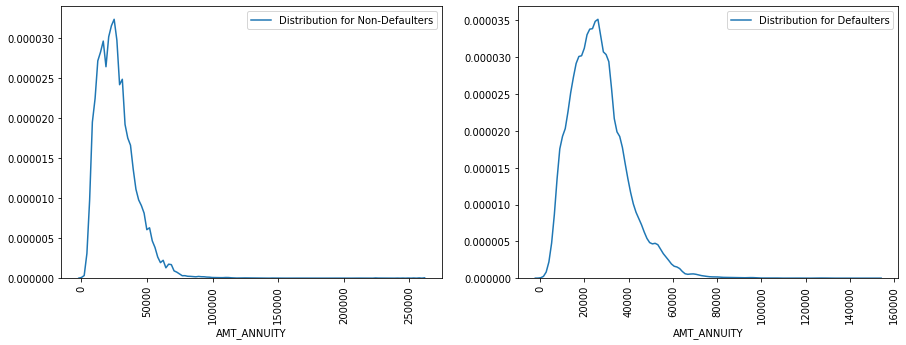

In [198]:
plot_continous('AMT_ANNUITY')

#### For AMT_ANNUITY between 20,000-40,000, defaulters are more. Also ,most of the annuity clients are from first quartile in both the cases which is evident from below box plots. Mean in both cases is close to 26,000-27,000.

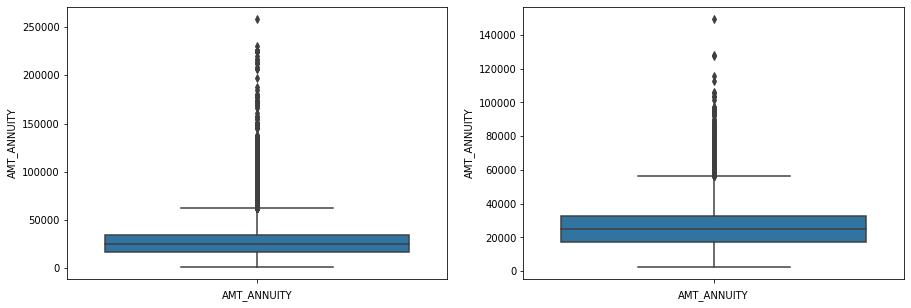

In [218]:
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.boxplot(data = Client_noDefault,x = 'AMT_ANNUITY',orient = 'v')
    plt.xticks(rotation=90)
    plt.xlabel('AMT_ANNUITY')
    
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data = Client_Default,x = 'AMT_ANNUITY',orient = 'v')
    plt.xticks(rotation=90)
    plt.xlabel('AMT_ANNUITY')
    
    
    plt.show()

In [213]:
Client_Default.AMT_ANNUITY.mean()

26481.744290030212

In [214]:
Client_noDefault.AMT_ANNUITY.mean()

27163.62334880463

## Bivariate Analysis

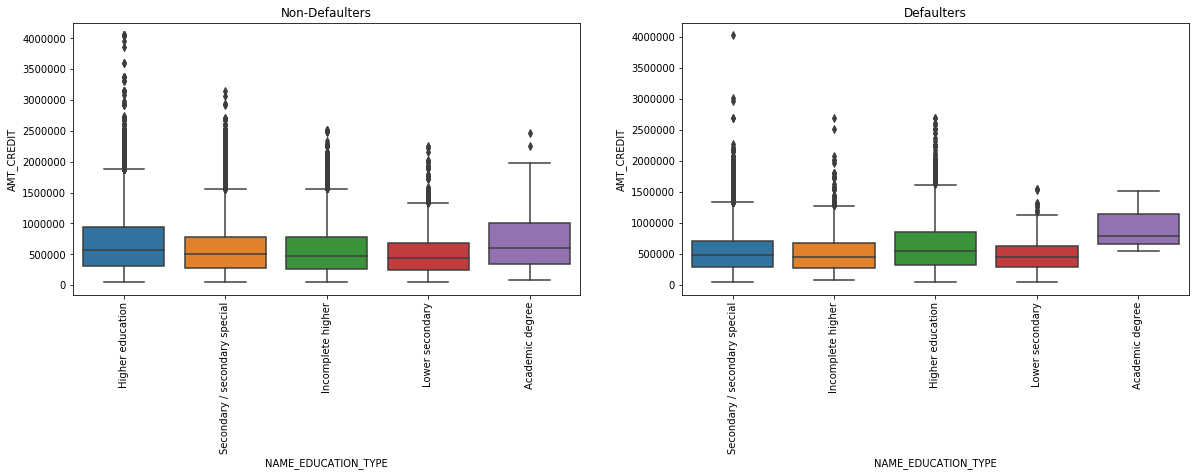

In [221]:
## Bivariate Cate-Conti
## NAME_EDUCATION_TYPE' vs 'AMT_CREDIT' 

plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Non-Defaulters")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = Client_noDefault)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Defaulters")
sns.boxplot(x  = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = Client_Default)

plt.xticks(rotation=90)

plt.show()

#### Observation:  We observe that Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'.

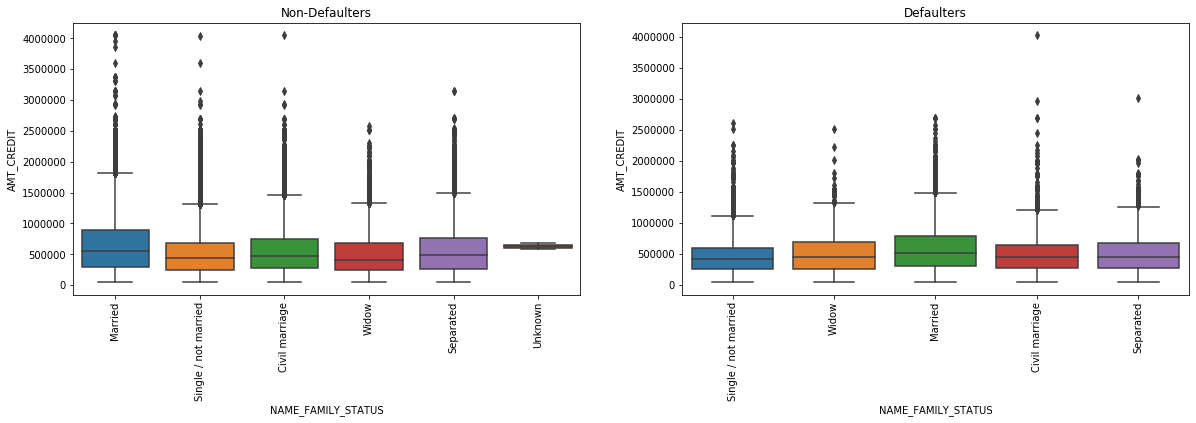

In [222]:
## Bivariate Cate-Conti
## NAME_FAMILY_STATUS' vs 'AMT_CREDIT' 

plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Non-Defaulters")
sns.boxplot(x = 'NAME_FAMILY_STATUS', y = 'AMT_CREDIT', data = Client_noDefault)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Defaulters")
sns.boxplot(x  = 'NAME_FAMILY_STATUS', y = 'AMT_CREDIT', data = Client_Default)

plt.xticks(rotation=90)

plt.show()

The graphs for Defaulters and Non -Defaulters looks similar. We observe that Family status of 'married' are having higher number of credits than others. All of them have outliers and 'married' category has more outliers in the higher range for Non -Defaulters.

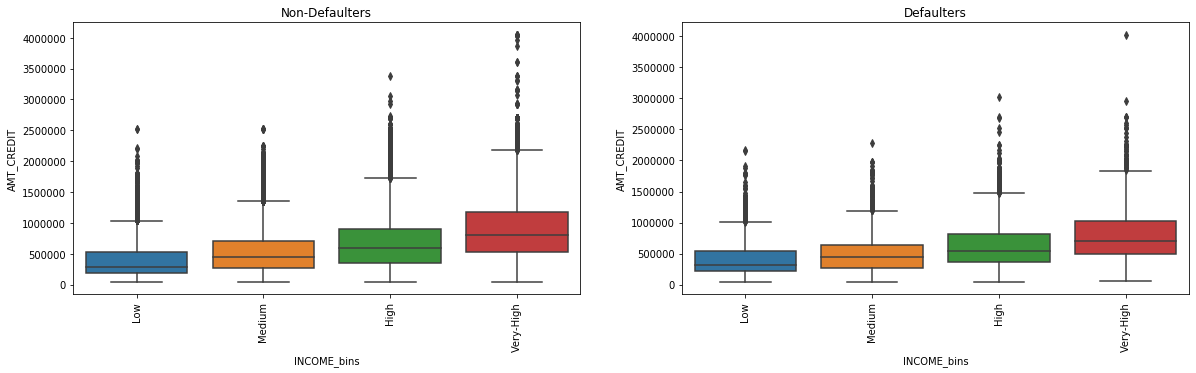

In [228]:
## Bivariate Cate-Conti
## INCOME_bins' vs 'AMT_CREDIT' 

plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Non-Defaulters")
sns.boxplot(x = 'INCOME_bins', y = 'AMT_CREDIT', data = Client_noDefault)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Defaulters")
sns.boxplot(x  = 'INCOME_bins', y = 'AMT_CREDIT', data = Client_Default)

plt.xticks(rotation=90)

plt.show()


 #### We observe that those who have high income range are having higher number of credits than others.

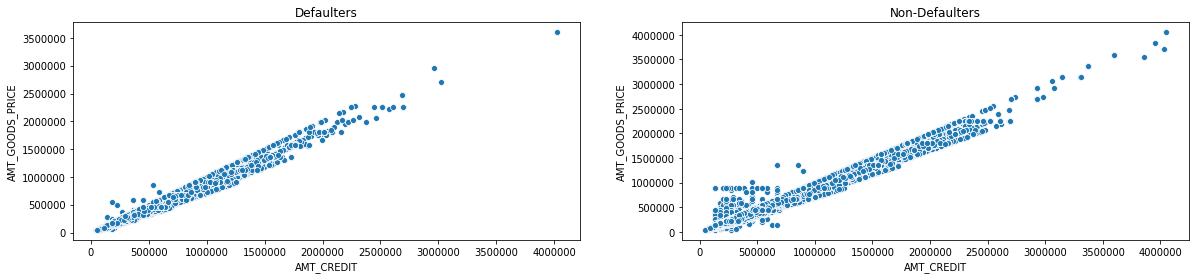

In [230]:
# Bivariate Conti-Conti
# AMT_CREDIT vs AMT_GOODS_PRICE
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.scatterplot(x = 'AMT_CREDIT', y = 'AMT_GOODS_PRICE', data = Client_Default)


plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.scatterplot(x = 'AMT_CREDIT', y = 'AMT_GOODS_PRICE', data = Client_noDefault)
plt.show()

#### We observe that there is a strong correlation between AMT_CREDIT and AMT_GOODS_PRICE. There are some outliers in both the cases.

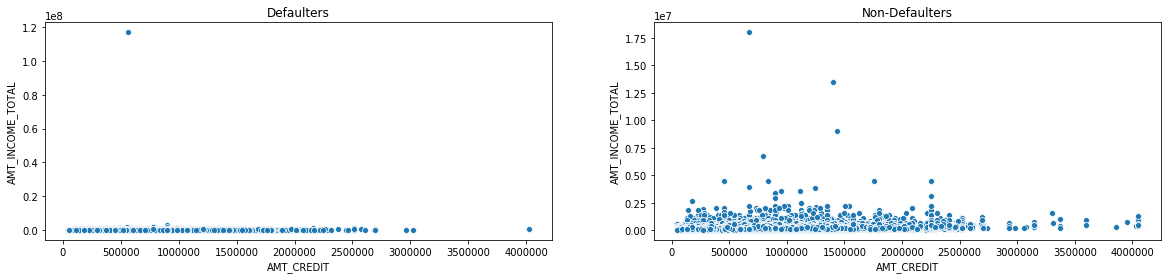

In [232]:
# Bivariate Conti-Conti
# AMT_CREDIT vs AMT_ANNUITY
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.scatterplot(x = 'AMT_CREDIT', y = 'AMT_INCOME_TOTAL', data = Client_Default)


plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.scatterplot(x = 'AMT_CREDIT', y = 'AMT_INCOME_TOTAL', data = Client_noDefault)
plt.show()

#### We observe that there is weak correlation between credit amount v/s amount income total for both Defaulters and Non-Defaulters.

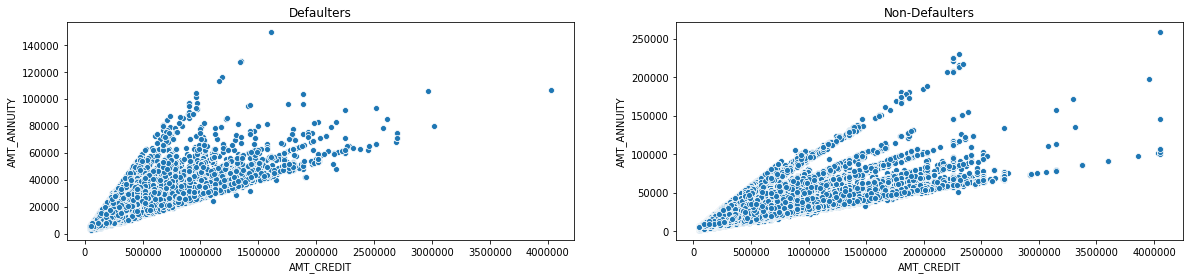

In [233]:
# Bivariate Conti-Conti
# AMT_CREDIT vs AMT_ANNUITY
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.scatterplot(x = 'AMT_CREDIT', y = 'AMT_ANNUITY', data = Client_Default)


plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.scatterplot(x = 'AMT_CREDIT', y = 'AMT_ANNUITY', data = Client_noDefault)
plt.show()

#### There is a good correlation between AMT_CREDIT and AMT_ANNUITY. There are few outliers observed in both the cases.

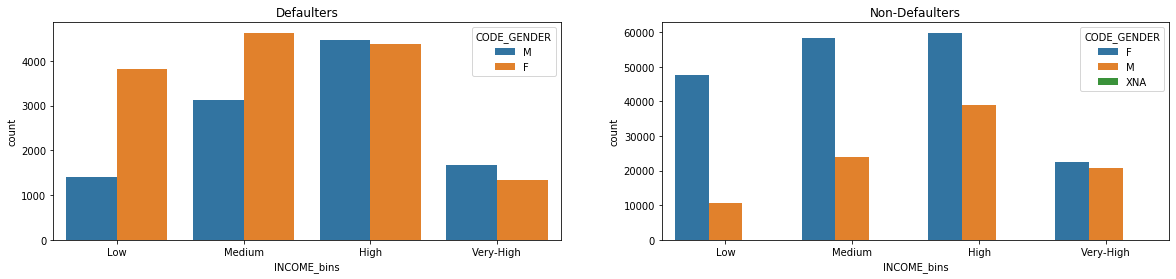

In [235]:
#Bivariate cate-cate
# INCOME_bins vs CODE_GENDER

plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.countplot('INCOME_bins', hue = 'CODE_GENDER', data =Client_Default)

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.countplot('INCOME_bins', hue = 'CODE_GENDER', data =Client_noDefault)
plt.show()

#### Female  Clients who have LOW and Medium income have maximum % of Loan-Payment Difficulties.

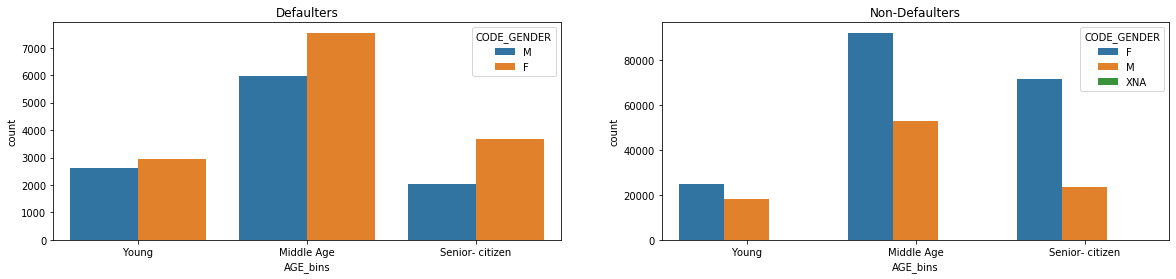

In [271]:
#Bivariate cate-cate
# AGE vs CODE_GENDER

plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.countplot('AGE_bins', hue = 'CODE_GENDER', data =Client_Default)

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.countplot('AGE_bins', hue = 'CODE_GENDER', data =Client_noDefault)
plt.show()

#### Middle Age Male and female are more in defaulters compared to young and senior citizens.

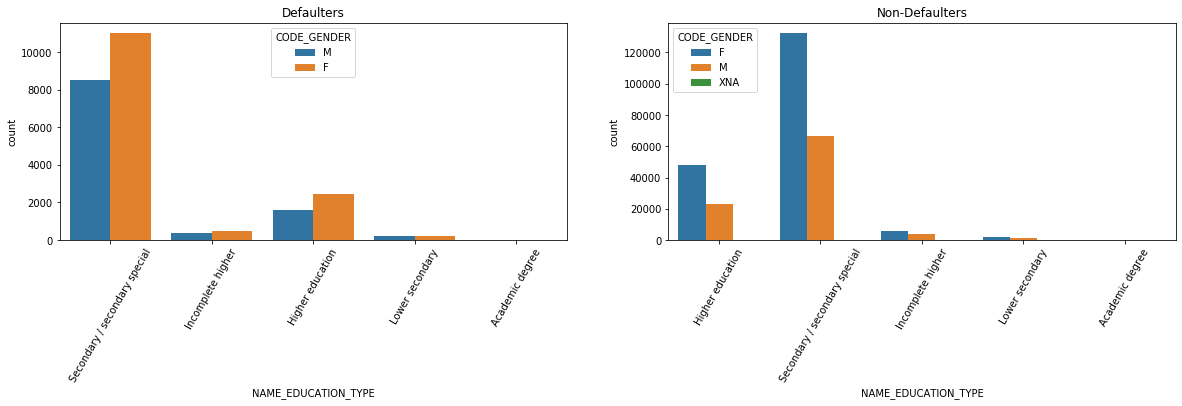

In [273]:
#Bivariate cate-cate
# education type vs CODE_GENDER

plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("Defaulters")
plt.xticks(rotation = 60)
sns.countplot('NAME_EDUCATION_TYPE', hue = 'CODE_GENDER', data =Client_Default)

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
plt.xticks(rotation = 60)
sns.countplot('NAME_EDUCATION_TYPE', hue = 'CODE_GENDER', data =Client_noDefault)
plt.show()

#### Female and male clients with secondary/secondary special are more in defaulters however with higher education is less in defaulters

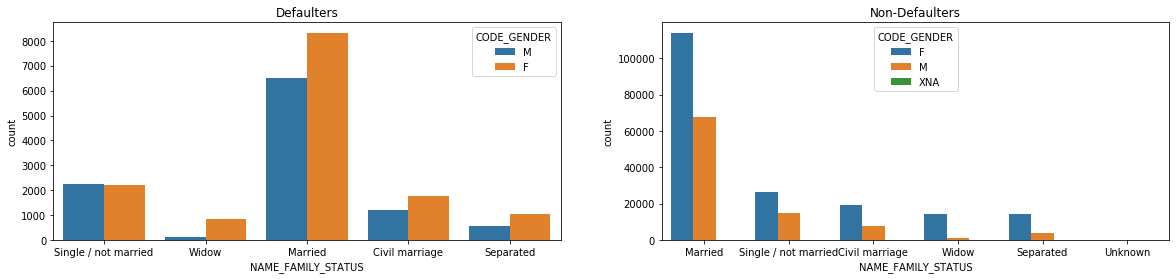

In [236]:
#Bivariate cate-cate
# NAME_FAMILY_STATUS vs CODE_GENDER

plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.countplot('NAME_FAMILY_STATUS', hue = 'CODE_GENDER', data =Client_Default)

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.countplot('NAME_FAMILY_STATUS', hue = 'CODE_GENDER', data =Client_noDefault)
plt.show()

#### Female  Clients who are married have maximum % of Loan-Payment Difficulties. For single/not married status male and female Loan-Payment Difficulties is almost same.

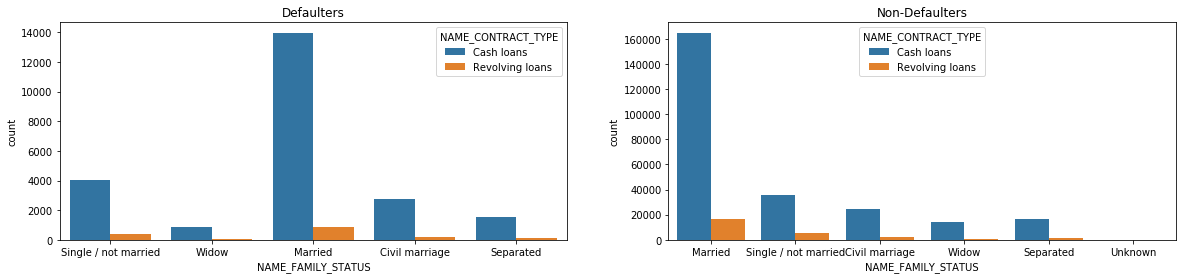

In [239]:
#Bivariate cate-cate
# NAME_FAMILY_STATUS vs NAME_CONTRACT_TYPE

plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("Defaulters")
sns.countplot('NAME_FAMILY_STATUS', hue = 'NAME_CONTRACT_TYPE', data =Client_Default)

plt.subplot(1,2,2)
plt.title("Non-Defaulters")
sns.countplot('NAME_FAMILY_STATUS', hue = 'NAME_CONTRACT_TYPE', data =Client_noDefault)
plt.show()

#### Clients who are married and are having cash loans has higher % of loan payment difficulties. Overall for any family status cash loans have more percentage of payment difficulties.

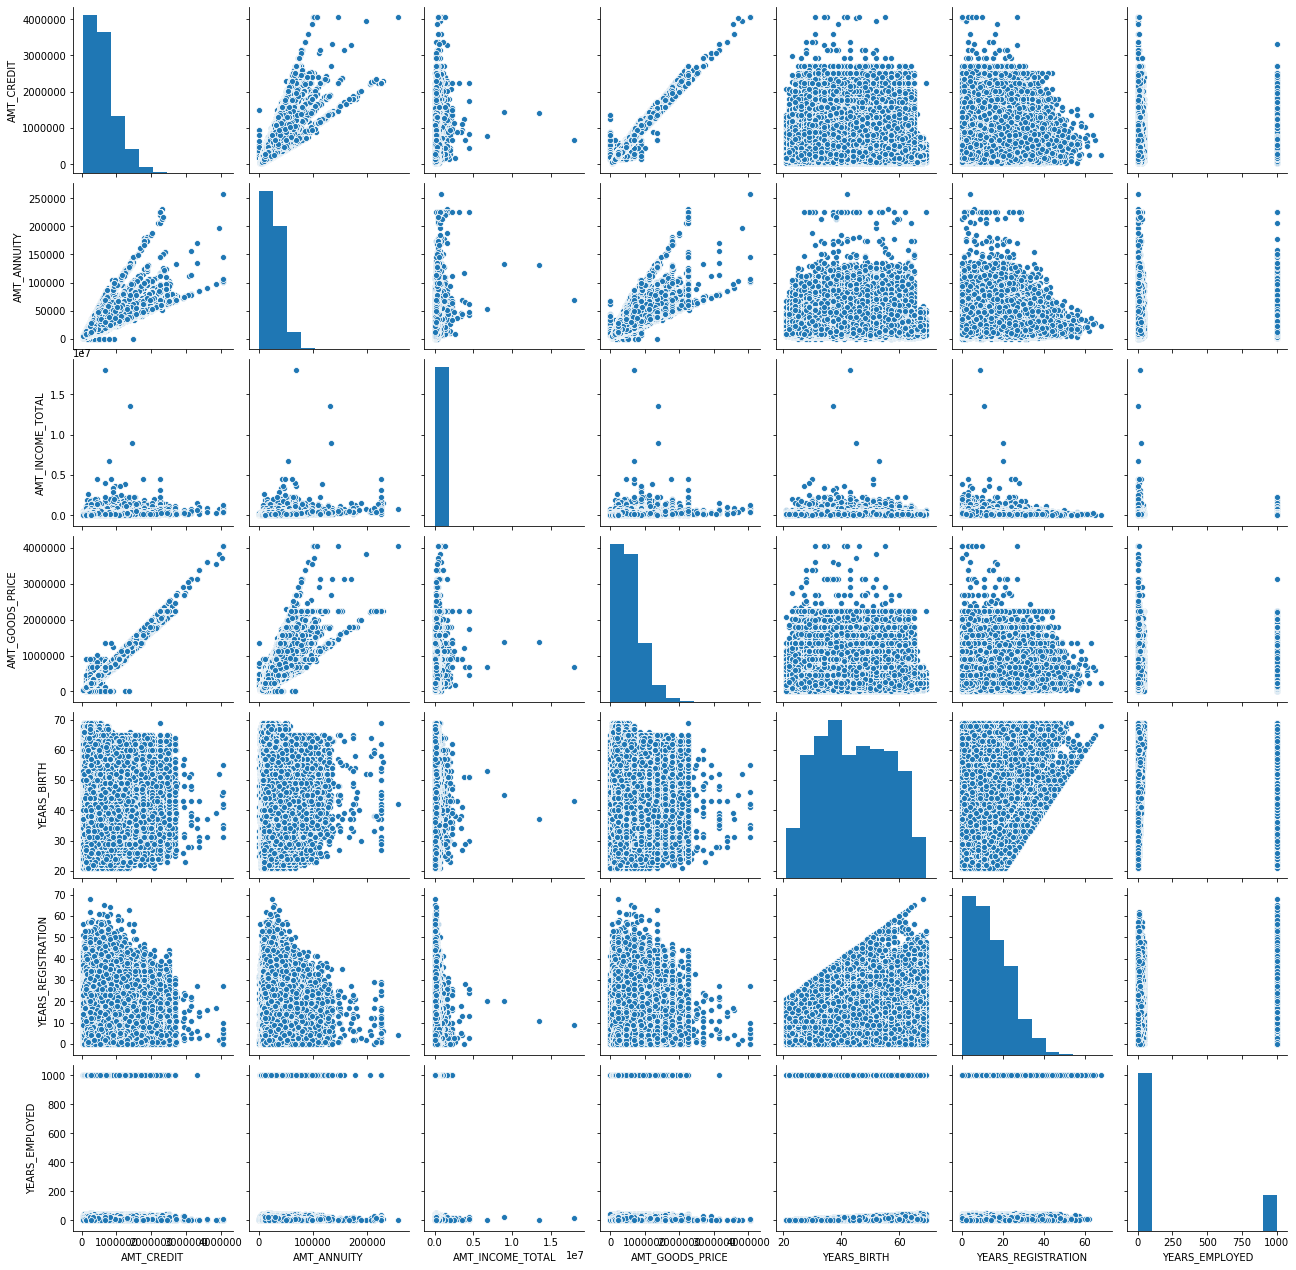

In [262]:
#Pairplot for Non - Defaulters
list1 = Client_noDefault[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'YEARS_BIRTH','YEARS_REGISTRATION','YEARS_EMPLOYED']].fillna(0)
sns.pairplot(list1)

plt.show()

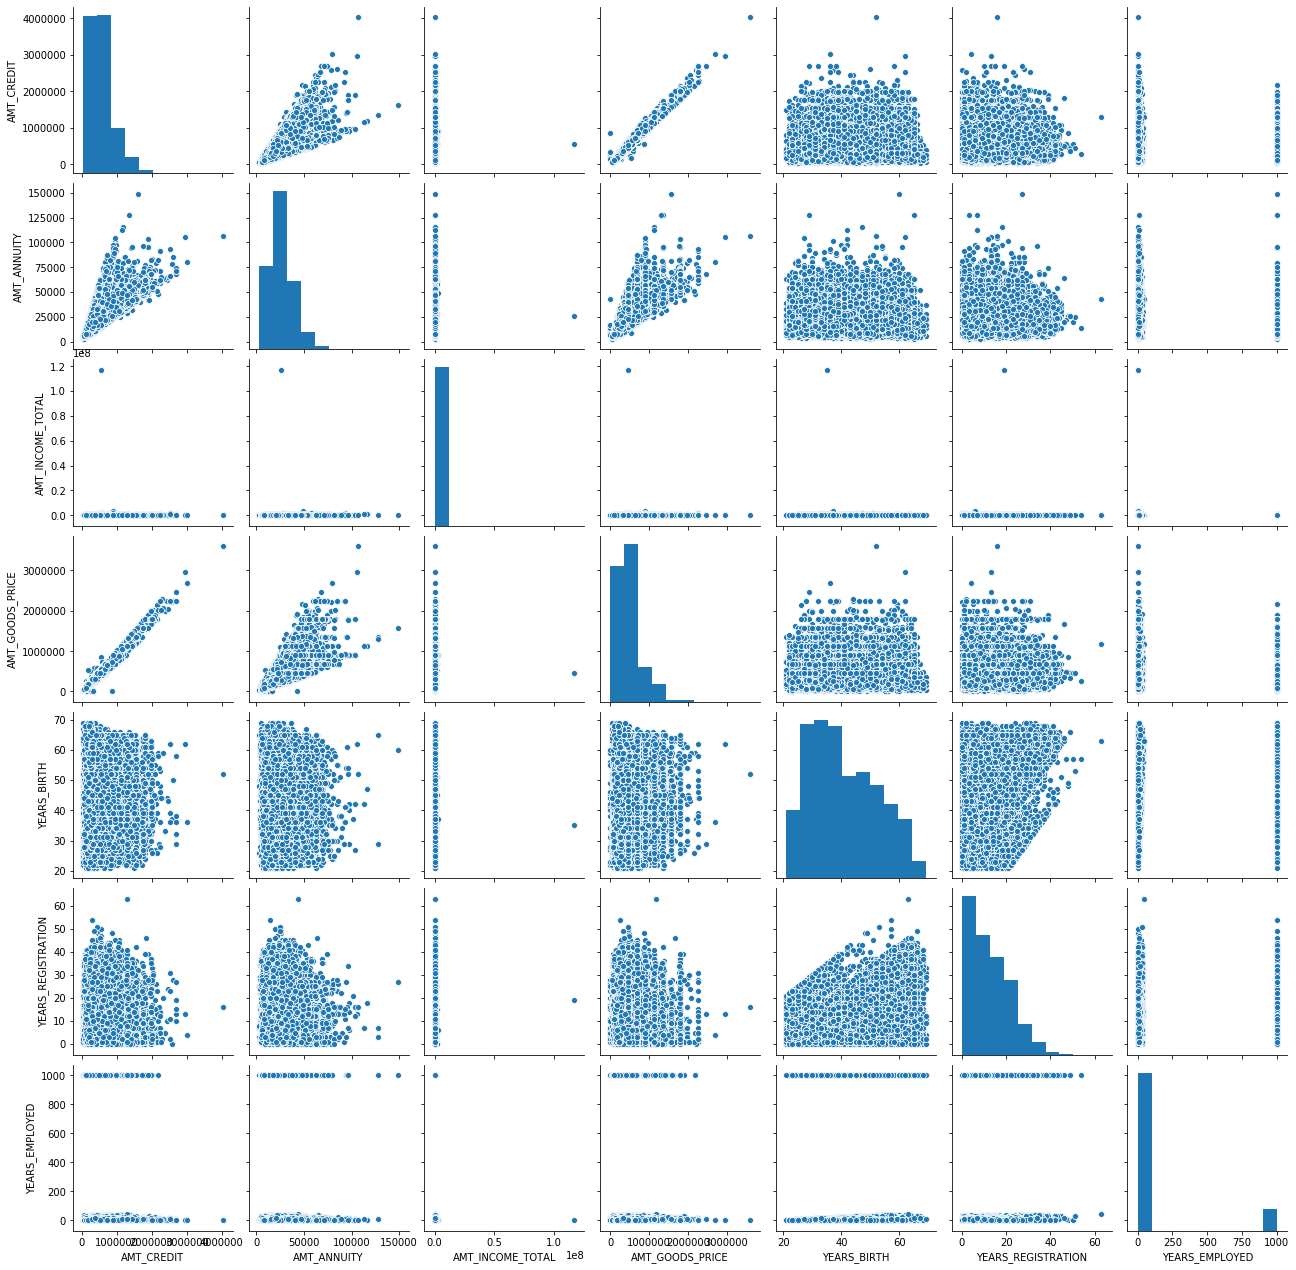

In [261]:
#Pairplot for Defaulters
list1 = Client_Default[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'YEARS_BIRTH','YEARS_REGISTRATION','YEARS_EMPLOYED']].fillna(0)
sns.pairplot(list1)

plt.show()

#### In defaulters AMT_INCOME_TOTAL has almost no correlation as its data is almost same as other variables increases. There are few data points that has been obsereved as outliers here.
#### In non-defaulters, there is some weak correlation observed between AMT_INCOME_TOTAL and AMT_ANNUITY.Lets analyse the correlations.

## Top 10 correlation

In [247]:
def top_10_corr(var):
    
    corr_1 = var.corr()
    corr_df = corr_1.where(np.triu(np.ones(corr_1.shape), k=1).astype(np.bool))
    corr_df = corr_df.unstack().reset_index()
    corr_df.columns = ['VAR1', 'VAR2', 'Correlation']
    corr_df.dropna(subset = ['Correlation'], inplace = True)
    corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()
    x = corr_df.sort_values(by = 'Abs_Correlation', ascending = False,ignore_index = True).head(10)
    return x

#### Loan Defaulters

In [268]:
top_10_corr(Client_Default)

,VAR1,VAR2,Correlation,Abs_Correlation
0,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
1,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637,0.956637
2,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484,0.885484
3,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
4,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
5,YEARS_EMPLOYED,YEARS_BIRTH,0.581765,0.581765
6,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,-0.446977,0.446977
7,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,-0.443236,0.443236
8,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT,-0.293908,0.293908
9,YEARS_REGISTRATION,YEARS_BIRTH,0.288783,0.288783


#### The above dataframe shows top 10 correlation for clients with payment difficulties.

#### Non-Defaulters

In [269]:
top_10_corr(Client_noDefault)

,VAR1,VAR2,Correlation,Abs_Correlation
0,AMT_GOODS_PRICE,AMT_CREDIT,0.987250,0.987250
1,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149,0.950149
2,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571,0.878571
3,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686
4,AMT_ANNUITY,AMT_CREDIT,0.771309,0.771309
5,YEARS_EMPLOYED,YEARS_BIRTH,0.625824,0.625824
6,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,-0.539005,0.539005
7,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,-0.537301,0.537301
8,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953,0.418953
9,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462,0.349462


#### The above dataframe shows top 10 correlation for clients with no payment difficulties.